# Exercises in linear regression

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [4]:
energy_efficiency = pd.read_csv("EnergyEfficiency.csv")

In [5]:
energy_efficiency

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.

In [6]:
energy_efficiency["SurfaceArea"].corr(energy_efficiency["HeatingLoad"])

-0.6581202267776214

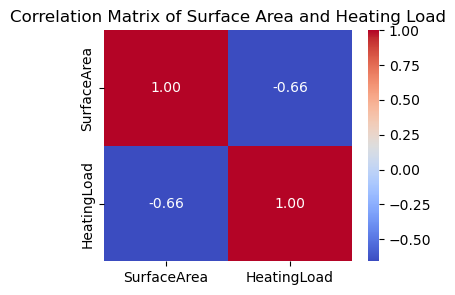

In [7]:
# Calculating and visualizing the correlation matrix.
correlation_matrix = energy_efficiency[['SurfaceArea', 'HeatingLoad']].corr()
plt.figure(figsize=(4, 3)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Added annotation and colormap
plt.title('Correlation Matrix of Surface Area and Heating Load')
plt.show()

* null hypothesis (H0): There is no linear correlation between "SurfaceArea" and "HeatingLoad".

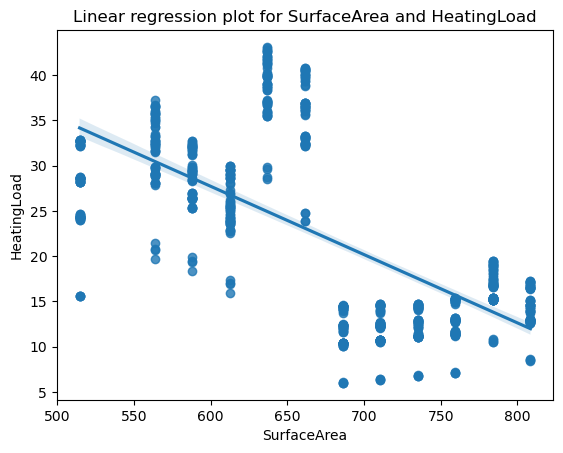

PearsonRResult(statistic=-0.6581202267776207, pvalue=1.686907290216124e-96)


In [8]:
# Calculating and visualizing Linear regression plot
sns.regplot(data = energy_efficiency, x = "SurfaceArea", y = "HeatingLoad")
plt.title("Linear regression plot for SurfaceArea and HeatingLoad")
plt.show()
print(stats.pearsonr(energy_efficiency["SurfaceArea"],energy_efficiency["HeatingLoad"]))

2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

* The null hypothesis (H0) states that there is no linear correlation between 'SurfaceArea' and 'HeatingLoad'. The p-value (1.69e-96) is far less than the significance level of 0.05, so we reject the null hypothesis. This indicates a statistically significant linear correlation exists. The Pearson correlation coefficient is -0.658, indicating a negative, moderate linear correlation. This means that, in general, as SurfaceArea increases, HeatingLoad tends to decrease. However, this result is counterintuitive, as one might expect a larger surface area to require a higher heating load. Further investigation is warranted to explore potential confounding variables, data errors, or the possibility of a non-linear relationship or unexpected causal relationships that might explain this unexpected finding 

3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

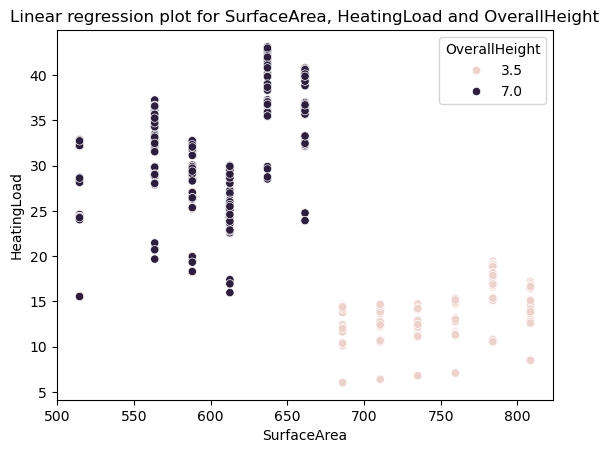

In [9]:
sns.scatterplot(data = energy_efficiency, x = "SurfaceArea", y = "HeatingLoad", hue = "OverallHeight")
plt.title("Linear regression plot for SurfaceArea, HeatingLoad and OverallHeight")
plt.show()

Adding hue = "OverallHeight" to the scatter plot shows that 'OverallHeight' affects the relationship between 'SurfaceArea' and 'HeatingLoad'. We see two separate groups of points: one for buildings with an 'OverallHeight' of 7, and another for buildings with an 'OverallHeight' of 3.5. Buildings with a higher 'OverallHeight' tend to have a higher 'HeatingLoad'. To understand the relationship between 'SurfaceArea' and 'HeatingLoad' better, we we should use Multiple Linear Regression.

4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

In [10]:
import statsmodels.api as sm

In [11]:
X = energy_efficiency["SurfaceArea"]
# Adding a constant (intercept)
X = sm.add_constant(X)

In [12]:
y = energy_efficiency["HeatingLoad"]

In [13]:
# Fit the linear regression model
linreg_model = sm.OLS(y, X).fit()

5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?

In [14]:
print(linreg_model.summary())
print(linreg_model.params)

                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        14:47:12   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      

* The linear regression model, using 'SurfaceArea' to predict 'HeatingLoad', explains approximately 43.3% of the variance in 'HeatingLoad' (R-squared = 0.433). The coefficient for 'SurfaceArea' is -0.075, indicating that for each one-unit increase in 'SurfaceArea', 'HeatingLoad' is predicted to decrease by 0.075 units. we can also conclude that this relationship is indeed statistically significant.

6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.

In [15]:
#manually calculating the prediction for each point
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*energy_efficiency["SurfaceArea"]
pred_y

0      34.158690
1      34.158690
2      34.158690
3      34.158690
4      30.464719
         ...    
763    13.841851
764    11.994866
765    11.994866
766    11.994866
767    11.994866
Name: SurfaceArea, Length: 768, dtype: float64

We can now manually add the OLS regression line to our scatter plot

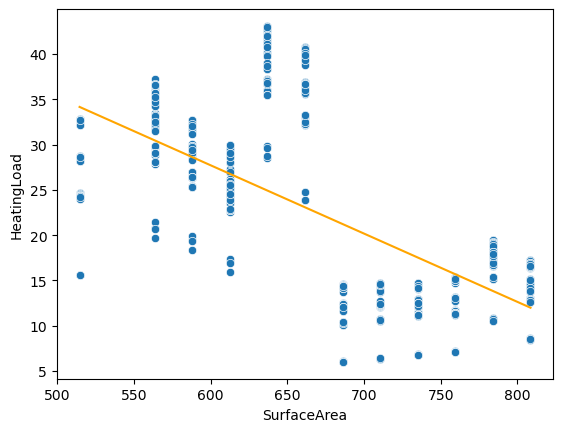

In [16]:
sns.scatterplot(data = energy_efficiency, x = "SurfaceArea", y = "HeatingLoad")
plt.plot(energy_efficiency["SurfaceArea"], pred_y, color = "orange")
plt.show()

7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

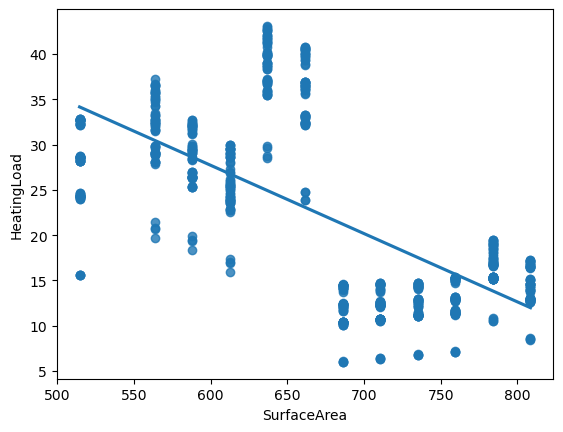

In [17]:
#The regression plot we got from Seaborns regplot:
sns.regplot(data = energy_efficiency, x = "SurfaceArea", y = "HeatingLoad", ci=None)
plt.show()

* now we can see that the manually added OLS regression line to our scatter plot and The regression plot we got from Seaborns regplot looks same. 

In [18]:
#Getting the prediction on our data directly from the model object using the predict method.
linreg_model.predict()

array([34.1586899 , 34.1586899 , 34.1586899 , 34.1586899 , 30.46471919,
       30.46471919, 30.46471919, 30.46471919, 28.61773383, 28.61773383,
       28.61773383, 28.61773383, 26.77074847, 26.77074847, 26.77074847,
       26.77074847, 24.92376311, 24.92376311, 24.92376311, 24.92376311,
       23.07677775, 23.07677775, 23.07677775, 23.07677775, 21.2297924 ,
       21.2297924 , 21.2297924 , 21.2297924 , 19.38280704, 19.38280704,
       19.38280704, 19.38280704, 17.53582168, 17.53582168, 17.53582168,
       17.53582168, 15.68883632, 15.68883632, 15.68883632, 15.68883632,
       13.84185096, 13.84185096, 13.84185096, 13.84185096, 11.9948656 ,
       11.9948656 , 11.9948656 , 11.9948656 , 34.1586899 , 34.1586899 ,
       34.1586899 , 34.1586899 , 30.46471919, 30.46471919, 30.46471919,
       30.46471919, 28.61773383, 28.61773383, 28.61773383, 28.61773383,
       26.77074847, 26.77074847, 26.77074847, 26.77074847, 24.92376311,
       24.92376311, 24.92376311, 24.92376311, 23.07677775, 23.07

In [19]:
#We can verify the actual data weth our manually calculated predictions to evaluate how good is our simple linear regression model.
pred_test_df = pd.DataFrame({"PredictMethod": linreg_model.predict(), "ManuallyCalculated" : pred_y})
pred_test_df["Difference"] = pred_test_df["PredictMethod"] - pred_test_df["ManuallyCalculated"]
pred_test_df

,PredictMethod,ManuallyCalculated,Difference
0,34.158690,34.158690,0.0
1,34.158690,34.158690,0.0
2,34.158690,34.158690,0.0
3,34.158690,34.158690,0.0
4,30.464719,30.464719,0.0
...,...,...,...
763,13.841851,13.841851,0.0
764,11.994866,11.994866,0.0
765,11.994866,11.994866,0.0
766,11.994866,11.994866,0.0


In [20]:
sum(pred_test_df["Difference"])

0.0

* We can verify that they are the same as our manually calculated predictions.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

In [21]:
# Prepare the data
X = energy_efficiency[["SurfaceArea", "OverallHeight", "GlazingArea", "Orientation"]]
X_const = sm.add_constant(X)  # Add a constant (intercept)
y = energy_efficiency["HeatingLoad"]

In [22]:
# Fit the multiple linear regression model
mult_linreg_model = sm.OLS(y, X_const).fit()

# Print the model summary
print("\nMultiple Linear Regression Model Summary:")
print(mult_linreg_model.summary())


Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1835.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:47:13   Log-Likelihood:                -1957.2
No. Observations:                 768   AIC:                             3924.
Df Residuals:                     763   BIC:                             3948.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

**Interpretation of the model**

We see a fairly high R-squared of 0.906.

The "Orientation" is not statistically significantly different from 0, the rest of the predictor variables are. Depending on the purpose of our modeling, it might make sense to remove the variables which coefficients are not significantly different from zero.

2. Evaluate the multiple linear regression model

In [23]:
#r-squared
r_squared_mult=mult_linreg_model.rsquared
r_squared_mult

0.905848995226519

In [24]:
linreg_model.rsquared

0.433122232893828

* The multiple linear regression model is better than the simple linear regression model (higher R-squared)

In [25]:
#
r_squ_adj_mult=mult_linreg_model.rsquared_adj
r_squ_adj_mult

0.9053554119773788

In [26]:
linreg_model.rsquared_adj

0.43238218358951186

In [27]:
resid_mult=mult_linreg_model.resid
resid_mult

0     -7.239110
1     -7.215782
2     -7.192454
3     -7.169126
4     -4.188091
         ...   
763   -0.487786
764   -3.017261
765   -3.093933
766   -3.030605
767   -2.847277
Length: 768, dtype: float64

In [28]:
linreg_model.resid

0     -18.608690
1     -18.608690
2     -18.608690
3     -18.608690
4      -9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64

In [29]:

# Make predictions
y_predicted_mult = mult_linreg_model.predict(X_const)

In [30]:
# Using these, we can calculate the *MAE* (Mean Absolute Error).
mae_mult = np.mean(np.abs(resid_mult))
print(f"Multiple Linear Regression MAE(Mean Absolute Error): {mae_mult:.3f}")

Multiple Linear Regression MAE(Mean Absolute Error): 2.361


In [31]:
np.mean(np.abs(linreg_model.resid))

6.002338517195693

* The multiple linear regression model is better than the simple linear regression model (lower MAE)

In [32]:
# the *MSE* (Mean Squared Error).
mse_mult = np.mean(resid_mult**2)
print(f"Multiple Linear Regression RMSE: {mse_mult:.3f}")

Multiple Linear Regression RMSE: 9.573


In [33]:
np.mean(linreg_model.resid**2)

57.63983779426345

* The multiple linear regression model is better than the simple linear regression model (lower MSE)

In [34]:
# The *RMSE* (Root Mean Squared Error).
rmse_mult=np.mean(np.abs(resid_mult**2))
rmse_mult

9.573225408033968

In [35]:
np.sqrt(np.mean(linreg_model.resid**2))

7.592090475900788

???

3. Check each of the assumptions/problems for linear regression.

### Non-linearity of the data

One of the assumptions of linear regression is that there is a linear relationship between the independent (X) variables and the dependent variable (y). 

For simple linear regression, we can make a scatterplot of the x and y variable and visually inspect for linear relationship. However, for multiple linear regression, we cannot do that. Instead, we can plot the residuals versus the predicted values:

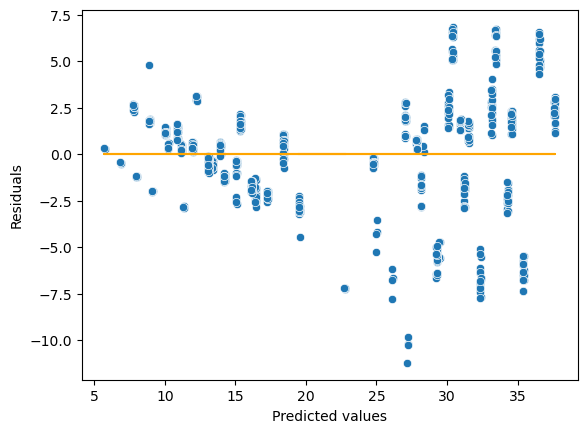

In [36]:
sns.scatterplot(x = y_predicted_mult, y = resid_mult)
plt.plot(y_predicted_mult, np.repeat(0, len(y_predicted_mult)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

They look like they go up a bit, maybe the relationship is not quite linear, but the points almost fall equally along the x-axis. In other words, there is no clear pattern suggesting that the data is not approximately linear.

### Correlation of error terms 

Another assumption of linear regression is that the error terms are uncorrelated, in other words, the i'th error term $e_i$ does not tell us anything about i+1'th error term $e_{i+1}$. Thus, to investigate this, we can plot the residuals in order of their appearance (or by time, if there is a time variable). As we have no time variable, we can instead plot the residuals versus their row number.

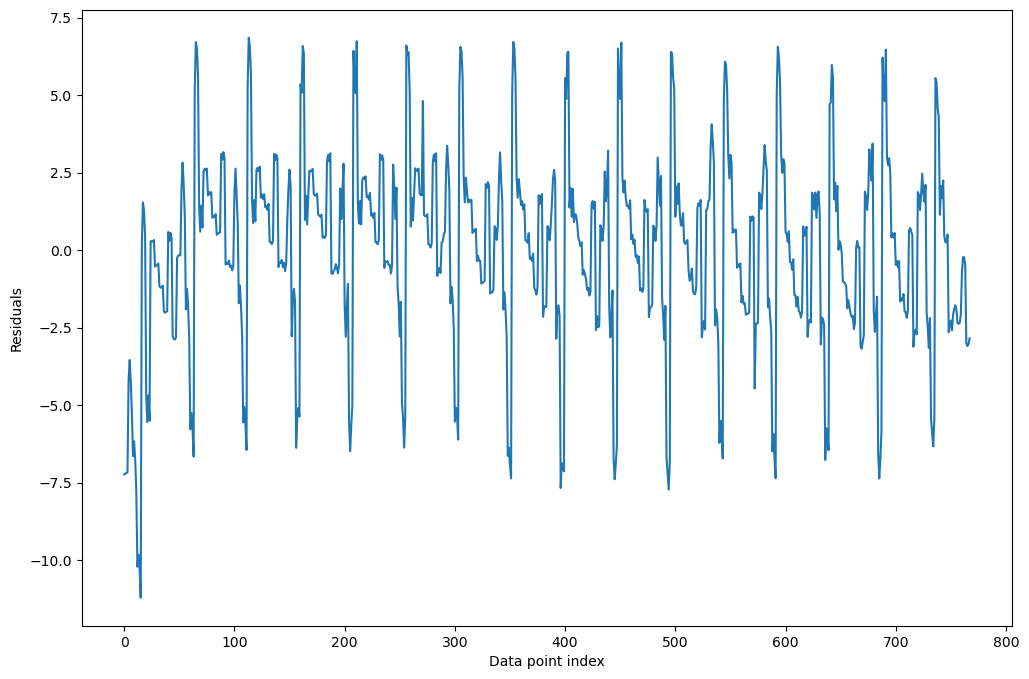

In [37]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0,len(resid_mult)), y = resid_mult)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

It is actually a bit hard to see from this plot if there is any correlation between the error terms, in terms of longer sections of value above or below 0. However, there are no clear such sections or pattern, so there is no obvious correlation, at least. Thinking about the data, it is also not obvious how a correlation among errors should have arisen.

### Outliers

Outliers in regard to linear regression models, are points for which the predicted value is very far from the actual values. These we can also spot in the residual vs predicted values plot. So let us not make the plot again, but just look at the plot above.

The three points, at the bottom right, looks like they could be outliers as their absolute residual values are quite high. Thus, it would make sense to investigate those point further to see if there are any errors in the data or other reasons from them being outliers.

### High leverage points

High leverage points are a bit like residuals. They are point that as a high influence on how the model looks. In simple linear regression, this means that a high leverage point might heavily affect where the regression line lies. Note that outliers are extreme values in a sense, but they do not need to have high leverage as they might not affect the actual model fit that much.

High leverage points are usually points that have an x-value far away from the other x-values in the dataset. This is easy to spot in simple linear regression where we only have on x variable. However, it is much harder to spot directly for multiple linear regression. Luckily, there is a leverage statistics we can calculate for each point based on a linear regression model, which we can use to make a "Leverage plot".